# Génération de labyrinthes

Dans cet atelier de recherche, nous allons générer des labyrinthes de façon aléatoires.

Pour cela, nous devons répondre à plusieurs questions :
- comment afficher un labyrinthe ?
- qu'est-ce qu'un labyrinthe ?
- comment le générer ?
- comment en faire de plus originaux ?

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import random
from PIL import Image

## Élements de labyinthe -- affichage

1. Un labyrinthe peut être vu comme un ensemble de cases, avec des murs entre ces cases
2. Un mur devient un passage en prenant les mêmes propriétés qu'une case.

### Questions:

1. définir la largeur et la hauteur du labyrinthe
2. définir une matrice de la bonne taille
3. la remplir avec deux valeur différente, une pour les murs et une pour les cases.

In [ ]:
# définir hauteur et largeur
couleur_case = 0
couleur_mur = 1
couleur_vue = .5
hauteur = 50
largeur = 50

In [ ]:
# fonction qui fait une grille
def genere_grille():
	hauteur_grille, largeur_grille = 2*hauteur+1, 2*largeur+1
	grille = np.zeros((hauteur_grille, largeur_grille))
	for i in range(hauteur+1):
		grille[2*i,:]=np.ones(largeur_grille)
	for j in range(largeur+1):
		grille[:,2*j]=np.ones(hauteur_grille)

	return grille

## Un premier algorithme: l'algorithme de l'arbre binaire

Cet algorithme a l'avantage d'êêtre très simple et très rapide. On peut le décrire de la façon suivante:

Énumérer toutes les cases. Pour chacune, choisir au hasard d'ouvrir le mur de droite ou du bas

1. Implémenter une fonction pour ouvrir un mur
2. Implémenter une fonction qui génére un labyrinthe selon et algorithme
3. Afficher le résultat


In [ ]:
# ouvrir un mur
def ouvrir_mur(u,v,grille):
	if not u==v:
		
		if u[0]==v[0]:
			assert(abs(v[1]-u[1])==2)
			grille[u[0]][int((u[1]+v[1])/2)] = couleur_vue

		elif u[1] == v[1]:
			assert(abs(v[0]-u[0])==2)
			grille[int((u[0]+v[0])/2)][u[1]] = couleur_vue

		else:
			raise ValueError("Les deux cases ne sont pas adjacentes")

In [ ]:
# générer un labyrinthe
def case_to_position(case):
	# traduit la case en sa position dans la matrice
  assert(0 <= case[0] <= hauteur)
  assert(0 <= case[1] <= largeur)
  return [1+2*case[0], 1+2*case[1]]

def binary_tree(grille):
  print(hauteur, largeur)
  for i in range(hauteur):
    for j in range(largeur):
      if i == hauteur-1 and  j == largeur-1:
        pass
      elif j == largeur-1:
        case_grille = case_to_position([i,j])
        case_bas_grille = [case_grille[0]+2, case_grille[1]]
        ouvrir_mur(case_grille, case_bas_grille, grille)
      elif i == hauteur-1:
        case_grille = case_to_position([i,j])
        case_droite_grille = [case_grille[0], case_grille[1]+2]
        ouvrir_mur(case_grille, case_droite_grille, grille)
      else:
        if np.random.random()<.5:
          case_grille = case_to_position([i,j])
          case_droite_grille = [case_grille[0], case_grille[1]+2]
          ouvrir_mur(case_grille, case_droite_grille, grille)
        else:
          case_grille = case_to_position([i,j])
          case_bas_grille = [case_grille[0]+2, case_grille[1]]
          ouvrir_mur(case_grille, case_bas_grille, grille)


50 50


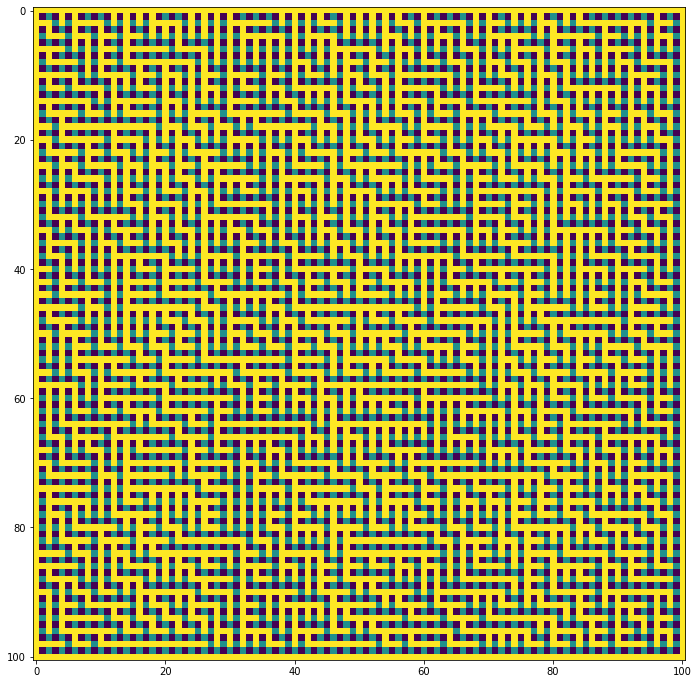

In [ ]:
grille = genere_grille()
binary_tree(grille)
plt.figure(figsize=(12,12))
plt.imshow(grille)
plt.show()

## Un labyrinthe, c'est un arbre !

1. Suivre la présentation.
2. Un arbre c'est un graphe qui pour n sommets a exactement n-1 arrêtes, qui est connexe et qui n'a pas de cycle
3. (*)  On peut montrer qu'il suffit de vérifier deux des propriétés précédentes pour que la troisième soit vérifiée
4. On considère que chaque case est un sommet, et qu'un passage est une arête, ce qui permet d'associer un graphe à un labyrinthe. Alors on peut montrer que le graphe est un arbre si et seulement si dans le labyrinthe associé, il existe toujours un unique chemin entre deux cases. (C'est la définition d'un labyrinthe parfait)

## L'algorithme de Prim

On souhaite créer un labyrinthe, et on sait maintenant que c'est la même chose que de créer un arbre. L'algorithme de Prim est prévu pour calculer un arbre de poids minimum, pour un graphe où chaque arête a un coût de prévu. Ici, on peut juste prendre au hasard, sans utiliser de poids prédéfini.

L'algorithme est le suivant:
- choisir une case dans le labyrinthe
- la marquer comme vue
- ajouter les murs adjacents dans un ordre aléatoire dans la liste des murs à traiter
- tant que la liste n'est pas vide, prendre un mur. S'il est entre une case pas encore visitée et une case visitée, détruire le mur, marqué la case comme visitée, et ajouter les murs adjacent de cette case.

Ici on peut utiliser la grille pour stocker l'information d'une case déjà vue ou non, par exemple en lui attribuant une valeur de 0.5

On utilise un liste pour les murs à traiter. En python , c'est assez simple à manipuler:
- on peut l'initialiser avec `ma_liste = []`
- ma_liste en tant que booléen vaut vrai si et seulement si la liste n'est pas vide
- `ma_liste.pop()` retourne le premier élément de la liste

In [ ]:
def calcul_murs(case):
	murs = []
	if case[0] > 0:
		murs.append(([case[0]-1, case[1]], case))
	if case[0] < hauteur-1:
		murs.append(([case[0]+1, case[1]], case))
	if case[1] > 0:
		murs.append(([case[0], case[1]-1], case))
	if case[1] < largeur-1:
		murs.append(([case[0], case[1]+1], case))
	random.shuffle(murs)
	return murs


# fonction qui modifie la grille pour faire l'algorithme de Prim
def creer_labyrinthe(grille, construction=False):
	debut = [0,0]
	grille[1,1]=couleur_vue
	pile_a_traiter = calcul_murs(debut)

	while pile_a_traiter:
		mur_actuel = pile_a_traiter.pop()
		position, voisin = mur_actuel[0], mur_actuel[1]
		position_grille, voisin_grille = case_to_position(position), case_to_position(voisin)
		if grille[position_grille[0], position_grille[1]] != couleur_vue: 	
			grille[position_grille[0], position_grille[1]] = couleur_vue
			ouvrir_mur(position_grille, voisin_grille, grille)
			pile_a_traiter += calcul_murs(position)


## Faire l'animation

On souhaite voir les différentes étapes de création du labyrinthes. Pour cela, on affiche la grille, puis les changements de celle-ci à chaque étape. Pour cela, on va stocker une copy de la grille a chaque étape dans un liste, puis on va créer une animation à partir de celle-ci.

on utilise le module plotly
https://plotly.com/python-api-reference/generated/plotly.express.imshow
Essayer de comprendre le paramètre `animation_frame` pour l'utilser. 

In [ ]:
# fonction précédente modifiée pour stocker les étapes de la grille
def creer_labyrinthe(grille, construction=False):
	debut = [0,0]
	grille[1,1]=couleur_vue
	pile_a_traiter = calcul_murs(debut)

	while pile_a_traiter:
		mur_actuel = pile_a_traiter.pop()
		position, voisin = mur_actuel[0], mur_actuel[1]
		position_grille, voisin_grille = case_to_position(position), case_to_position(voisin)
		if grille[position_grille[0], position_grille[1]] != couleur_vue: # on a déjà intégré la case au labyrinthe, on saute ce cas	
			grille[position_grille[0], position_grille[1]] = couleur_vue
			ouvrir_mur(position_grille, voisin_grille, grille)
			pile_a_traiter += calcul_murs(position)
			if construction:
				labyrinthes.append(grille.copy())

In [ ]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [ ]:
# affichage de l'animation
labyrinthes = []

grille = genere_grille()
labyrinthes.append(grille)
creer_labyrinthe(grille, construction=True)

labyrinthes = np.array(labyrinthes)

fig=px.imshow(labyrinthes, animation_frame=0, color_continuous_scale='Blues')
fig.show()

## Faire des puzzles de formes différentes

Pour l'instant, on a suivi la forme de la grille pour faire notre puzzle, mais on peut très bien dessiner une grille suivant une forme particulière, par exemple en suivant la forme d'une image.

Pour cela, choisir une image (une forme en noir et blanc de préférence), et la charger ici. (C'est ici qu'il faut avoir accès à un drive).

In [ ]:
image = Image.open('/content/drive/MyDrive/Colab Notebooks/cheval.png')


In [ ]:
new_image = image.resize((hauteur+1, largeur+1))
dessin = new_image.convert('L')

dessin = np.array(dessin)

plt.imshow(dessin)

In [ ]:
for i in range(len(dessin)):
  for j in range(len(dessin[0])):
    if dessin[i,j]>100:
      dessin[i,j]=1
    else:
      dessin[i,j]=0


## Modification du code précédent pour suivre le dessin

On doit modifier la génération de la grille en rajoutant une vérification de si on est dans l'image ou non.

On doit aussi changer l'ajout des murs, pour vériifer qu'il s'agit bien de mur.

Ensuite le tour est joué !

In [ ]:
# modification grille
def genere_grille_dessin(hauteur, largeur, dessin):	
	hauteur_grille, largeur_grille = 2*hauteur+1, 2*largeur+1
	grille = np.zeros((hauteur_grille, largeur_grille))
	for i in range(hauteur_grille):
		for j in range(largeur_grille):
			if (i%2==0 or j%2==0) and dessin[int(i/2)][int(j/2)]==0:
				grille[i][j] = 1

	return grille

In [ ]:
# modification mur
def calcul_mur_dessin(case, dessin):
	murs = []
	if case[0] > 0  and dessin[case[0]-1, case[1]]==0:
		murs.append(([case[0]-1, case[1]], case))
	if case[0] < hauteur-1 and dessin[case[0]+1, case[1]]==0:
		murs.append(([case[0]+1, case[1]], case))
	if case[1] > 0 and dessin[case[0], case[1]-1]==0:
		murs.append(([case[0], case[1]-1], case))
	if case[1] < largeur-1 and dessin[case[0], case[1]+1]==0:
		murs.append(([case[0], case[1]+1], case))
	random.shuffle(murs)
	return murs

In [ ]:
# Prim modifié
def creer_labyrinthe_dessin(grille, dessin, construction=False):
	debut = [int(hauteur/2),int(largeur/2)]
	i,j = case_to_position(debut)
	grille[i,j]=couleur_vue
	pile_a_traiter = calcul_mur_dessin(debut, dessin)

	while pile_a_traiter:
		mur_actuel = pile_a_traiter.pop()
		position, voisin = mur_actuel[0], mur_actuel[1]
		position_grille, voisin_grille = case_to_position(position), case_to_position(voisin)
		if grille[position_grille[0], position_grille[1]] != couleur_vue:	
			grille[position_grille[0], position_grille[1]] = couleur_vue
			ouvrir_mur(position_grille, voisin_grille, grille)
			pile_a_traiter += calcul_mur_dessin(position, dessin)
			if construction:
				labyrinthes.append(grille.copy())

In [ ]:
grille = genere_grille_dessin(hauteur, largeur, dessin)

creer_labyrinthe_dessin(grille, dessin, construction=False)
plt.figure(figsize=(10,10))
plt.imshow(grille, cmap='gray')

In [ ]:
grille = np.array(grille)
for i in range(len(grille)):
	for j in range(len(grille[0])):
		if grille[i,j]==.5:
			grille[i,j]=0
		else :
			grille[i,j]=1


## Pour enregistrer les figures

On peut enregister les figures via pyplot (c'est le plus simple mais c'est comme vous voulez !)



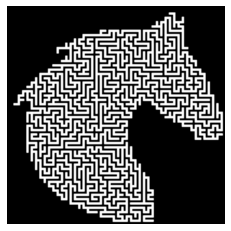

In [ ]:
plt.axis('off')
plt.imshow(grille, cmap='Greys')

plt.savefig("/content/drive/MyDrive/Colab Notebooks/cheval_labyrinthe.png", dpi=500, bbox_inches='tight')

## Pour aller plus loin:

- Il existe d'autres algorithmes de génération de labyrinthes, par exemple dans cette vidéo. On peut aussi les implémenter !
https://www.youtube.com/watch?v=sVcB8vUFlmU

- Il est possible d'afficher la croissance du labyrinthe en changeant la couleur au fur à mesure des cases visitées (il va juste falloir modifier la gestion des cases vues dans l'algorithme) 

- On peut aussi faire plusieurs labyrinthes pour des images en plusieurs parties : au lieu de commencer au centre de l'image, il faut tester si on est bien dans une case !

- On peut aussi choisir deux cases et afficher le chemin solution. Le plus simple est de faire ce qu'on appelle un parcours d'arbre, c'est à peu près le même algorithme que le premier de la vidéo au-dessus.

- D'autres idées ?